In [7]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage.transform import pyramid_gaussian
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
# import matplotlib.pyplot as plt
from inspect import signature

# print(glob.glob("../ILIYAN Master Thesis/Dataset/*"))

%matplotlib inline
%precision 2

'%.2f'

In [2]:
df = pd.read_csv('dataset/features_norm.csv', index_col=0)
df_t1 = pd.read_csv('dataset/fs/df_top_1.csv', index_col=0)
df_t1t2 = pd.read_csv('dataset/fs/df_top_1_and_2.csv', index_col=0)
df_rf = pd.read_csv('dataset/fs/df_embeded_rf_feature.csv', index_col=0)

In [8]:
def draw_confusionmatrix(y_test, y_hat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(y_test, y_hat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(y_test, y_hat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")
    print('\n')
    print(classification_report(y_test, y_hat))
    print('\n')

In [4]:
def gen_train_and_test(df, test_size=0.20, random_state=42):
    X = df.loc[:, df.columns != 'Class']
    y = df.Class
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [5]:
def split_train_and_test(X, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)    
    return X_train, X_test, y_train, y_test

In [6]:
def start_model(df, model):
    X_train, X_test, y_train, y_test = gen_train_and_test(df)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    draw_confusionmatrix(y_test, y_hat)

### GaussianNB

In [9]:
model = GaussianNB()

Sum Axis-1 as Classification accuracy: 0.7


             precision    recall  f1-score   support

        0.0       0.67      0.50      0.57         4
        1.0       0.71      0.83      0.77         6

avg / total       0.70      0.70      0.69        10





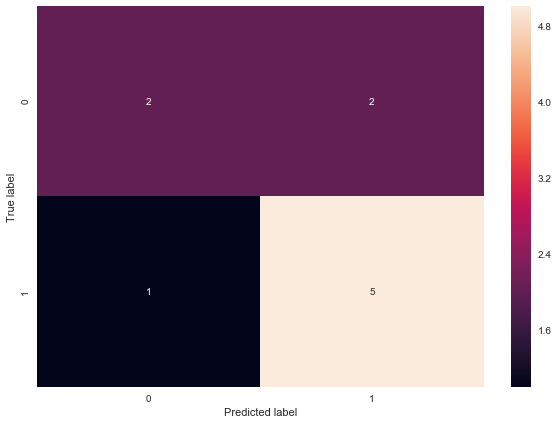

In [10]:
start_model(df, model)

Sum Axis-1 as Classification accuracy: 0.7


             precision    recall  f1-score   support

        0.0       0.67      0.50      0.57         4
        1.0       0.71      0.83      0.77         6

avg / total       0.70      0.70      0.69        10





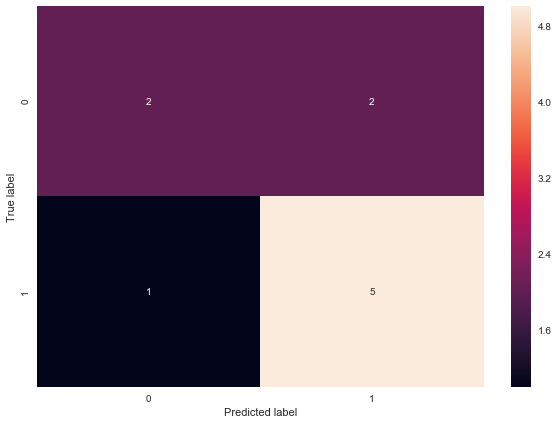

In [11]:
start_model(df_rf, model)

Sum Axis-1 as Classification accuracy: 0.7


             precision    recall  f1-score   support

        0.0       0.67      0.50      0.57         4
        1.0       0.71      0.83      0.77         6

avg / total       0.70      0.70      0.69        10





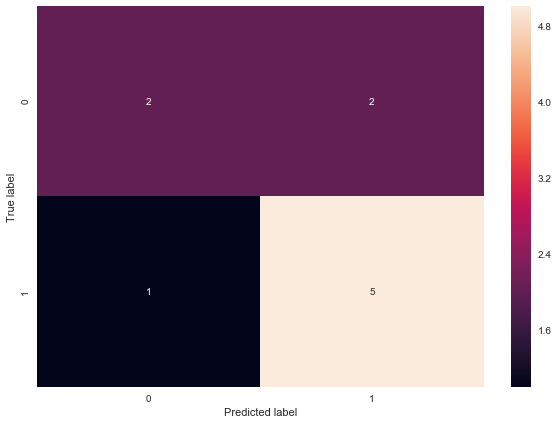

In [12]:
start_model(df_t1, model)

Sum Axis-1 as Classification accuracy: 0.7


             precision    recall  f1-score   support

        0.0       0.67      0.50      0.57         4
        1.0       0.71      0.83      0.77         6

avg / total       0.70      0.70      0.69        10





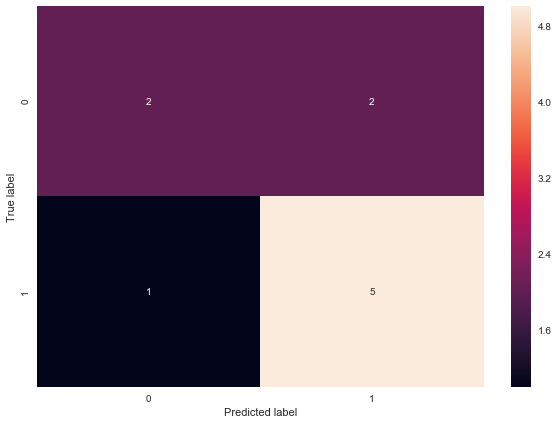

In [13]:
start_model(df_t1t2, model)

### MultinomialNB

In [15]:
model2 = MultinomialNB()

Sum Axis-1 as Classification accuracy: 0.5


             precision    recall  f1-score   support

        0.0       0.33      0.25      0.29         4
        1.0       0.57      0.67      0.62         6

avg / total       0.48      0.50      0.48        10





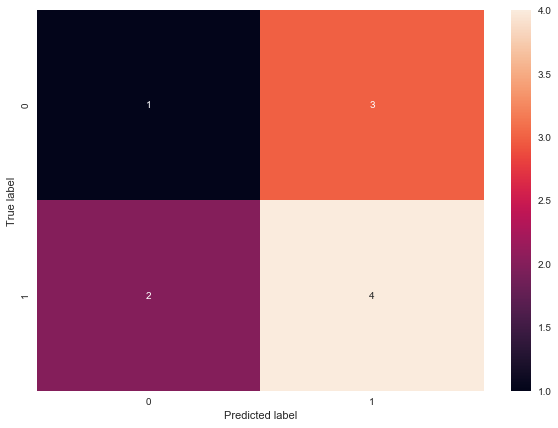

In [16]:
start_model(df, model2)

Sum Axis-1 as Classification accuracy: 0.6


             precision    recall  f1-score   support

        0.0       0.50      0.25      0.33         4
        1.0       0.62      0.83      0.71         6

avg / total       0.57      0.60      0.56        10





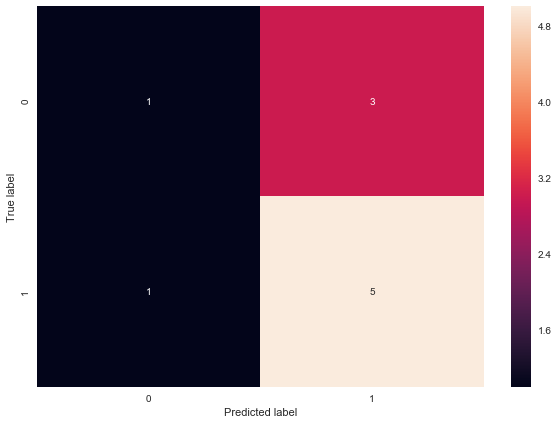

In [17]:
start_model(df_rf, model2)

Sum Axis-1 as Classification accuracy: 0.6


             precision    recall  f1-score   support

        0.0       0.50      0.25      0.33         4
        1.0       0.62      0.83      0.71         6

avg / total       0.57      0.60      0.56        10





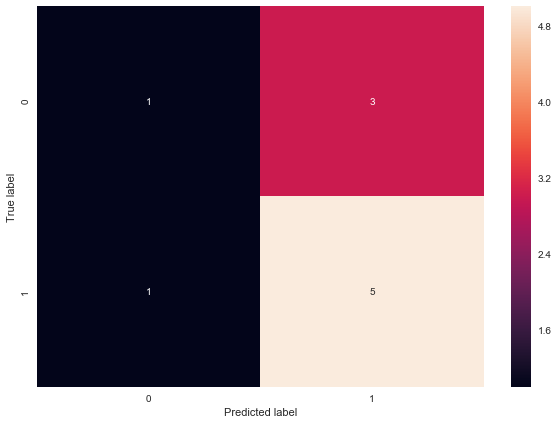

In [18]:
start_model(df_t1, model2)

Sum Axis-1 as Classification accuracy: 0.6


             precision    recall  f1-score   support

        0.0       0.50      0.25      0.33         4
        1.0       0.62      0.83      0.71         6

avg / total       0.57      0.60      0.56        10





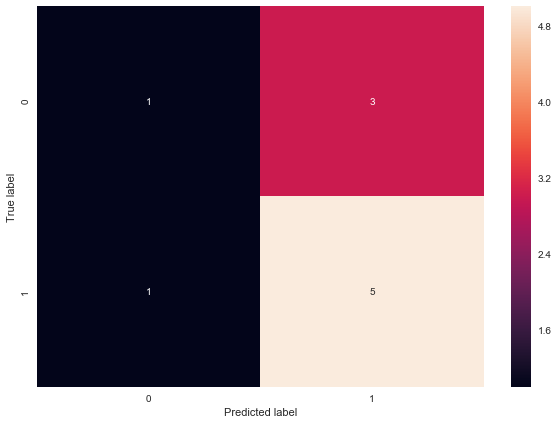

In [19]:
start_model(df_t1t2, model2)